/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: divide by zero encountered in log
/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:74: RuntimeWarning: divide by zero encountered in log


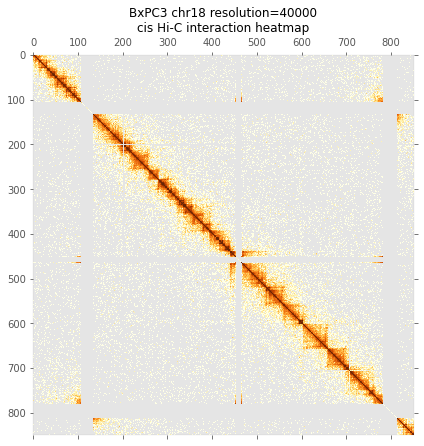

In [31]:
import argparse
import pandas as pd
import numpy as np
import os
import sys
import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt
from mpl_toolkits import axes_grid1
plt.style.use('ggplot')
#import itertools
#from functools import reduce
from scipy import sparse
import matplotlib.colors as colors

pd.set_option('display.precision', 2)
import argparse
import pandas as pd
import numpy as np
import os
import sys
import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt
from mpl_toolkits import axes_grid1
plt.style.use('ggplot')
#import itertools
#from functools import reduce
from scipy import sparse
import matplotlib.colors as colors

pd.set_option('display.precision', 2)

__author__ = 'Yuan Zan'
__mail__ = 'zanyuan@annoroad.com'
__date__ = '20160803'
__version__ = '1.0'
os.chdir('/result')

def add_colorbar(im, aspect=20, pad_fraction=0.5, **kwargs):
    """Add a vertical color bar to an image plot."""
    divider = axes_grid1.make_axes_locatable(im.axes)
    width = axes_grid1.axes_size.AxesY(im.axes, aspect=1/aspect)
    pad = axes_grid1.axes_size.Fraction(pad_fraction, width)
    current_ax = plt.gca()
    cax = divider.append_axes("right", size=width, pad=pad)
    plt.sca(current_ax)
    return im.axes.figure.colorbar(im, cax=cax, **kwargs)

def colormap1():
    # 白青绿黄红
    cdict = ['#FFFFFF', '#f5f329', '#e50b32']
    # 按照上面定义的colordict，将数据分成对应的部分，indexed：代表顺序
    return colors.ListedColormap(cdict, 'indexed')

def ppm(matrix):
    df = pd.DataFrame(np.ravel(np.log(matrix)))
    df = df[df != np.inf]
    df = df[df != -np.inf]
    pp = np.nanpercentile(df, 99)
    pm = np.nanpercentile(df, 20)
    return pm, pp


def heatmap(matrix,resolution,sample,outFile,chrom):
    fig = plt.figure(figsize=(7, 7))
    ax = fig.add_subplot(111)
    #cmaps = ['seismic','RdYlBu_r','RdBu_r','Spectral_r','coolwarm','RdYlGn_r']
    #cmaps = ['RdBu_r','Spectral_r','RdYlBu_r','RdBu_r','autumn_r','hot_r','Greys','Reds','YlOrBr','YlOrRd','hot_r','YlGn','YlGnBu','Blues','OrRd','summer','Oranges']
    cmaps = [plt.cm.get_cmap('Reds'),colormap1(),'YlOrBr','YlOrRd','autumn_r','hot_r']
    #cmap=plt.get_cmap(cmaps[3])

    pm, pp = ppm(matrix)
    cax = ax.matshow(np.log(matrix),cmap=cmaps[2],clim=(pm,pp))
    #ax.set_xlabel('chromosome')
    #ax.set_ylabel('Normalized interaction frequency')
    #help(ax.set_ylabel)
     
    ax.tick_params(bottom ='off',top='on',left='on',right='off') #去掉tick线
    ax.grid(False)
    #add_colorbar(cax)
    plt.title('{0} {1} resolution={2}\ncis Hi-C interaction heatmap'.format(sample,chrom,resolution),fontsize = 'large')
    #fig.add_axes(cax)
    #plt.colorbar(orientation="horizontal",cax=cax)

    ax.spines['bottom'].set_color('k')
    ax.spines['bottom'].set_linewidth(0.05)
    ax.spines['left'].set_color('k')
    ax.spines['left'].set_linewidth(0.05)
    ax.spines['top'].set_color('k')
    ax.spines['top'].set_linewidth(0.05)
    ax.spines['right'].set_color('k')
    ax.spines['right'].set_linewidth(0.05)

    plt.show()
    #fig.savefig(outFile)
def main():
    
    #matrix_file, bed_file, sample, chrom, outDir = argvs
    sample = 'BxPC3'
    outDir = './'
    chrom = 'chr18'
    #-----------------load file------------------#
    bed = pd.read_table('BxPC3_40000_chr18.bed',header=None,index_col = None,names=['chrom','start','end','bNum'],encoding='utf-8')
    bed = bed[bed['chrom'] == chrom]
    bed =bed[bed['start']>44000000]
    minN = bed.iloc[0,3]
    maxN = bed.iloc[-1,3]
    resolution = bed.iloc[0,2] - bed.iloc[0,1]
    #-----------------load iced asis matrix-------#
    '''
    nd1 = np.genfromtxt(args.icedAsisMatrix)

    nd1 = nd1[nd1[:,0] >= minN]
    nd1 = nd1[nd1[:,0] <= maxN]
    nd1 = nd1[nd1[:,1] >= minN]
    nd1 = nd1[nd1[:,1] <= maxN]
    '''


    #bed['bNum'] = bed['bNum'] - bed.iloc[0,3]
#    df.loc[:,0] = df.loc[:,0] - minN
#    df.loc[:,1] = df.loc[:,1] - minN
    #print (df)
    '''
    #----------------asis matrix consummate b2 b1 count-------#
    nd2 = nd1[nd1[:,1] != nd1[:,0]]
    nd2 = np.column_stack([nd2[:,1],nd2[:,0],nd2[:,2]])
    nd = np.vstack((nd1,nd2))
    nd1 = None
    nd2 = None
    '''
    #---------------------asis to complete matrix----------------------#    
    N = maxN - minN + 1

    df = pd.read_table('BxPC3_40000_chr18_symmetric.matrix', header=None,index_col = None,names=['b1','b2','contact'],encoding='utf-8')
    df= df[(df.iloc[:,0] >= minN) & (df.iloc[:,0] <= maxN) & (df.iloc[:,1] >= minN) & (df.iloc[:,1] <= maxN)]
    #df = df[df.iloc[:,0] <= maxN]
    #df = df[df.iloc[:,1] >= minN]
    #df = df[df.iloc[:,1] <= maxN]

    df['b1'] = df['b1'] - minN
    df['b2'] = df['b2'] - minN
    #df=df.replace([134],[452])
    #df=df.replace([452],[783])
    #df=df.replace([464],[107])
    """
    rlist=[]
    for i in range(784,133,-1):
        rlist.append(i)
    flist=[]
    for i in range(134,785):
        flist.append(i)
    df=df.replace(flist,rlist)

    df=df.replace([452],[133])
    """
    #df = df[df.iloc[:,0].isin(bed['bNum']) & df.iloc[:,1].isin(bed['bNum'])]
    #counts = sparse.coo_matrix((nd[:,2], (nd[:,0], nd[:,1])), shape=(N, N), dtype=float)
    counts = sparse.coo_matrix((df['contact'], (df['b1'], df['b2'])), shape=(N, N), dtype=float)
#    counts = np.array(counts.todense())
    df = pd.DataFrame(counts.todense(),index = bed['bNum'].tolist(),columns = bed['bNum'].tolist())
    counts = None

    #-----------------------matshow and save matrix-----------------#
    outFile = os.path.join(outDir,'{0}_{1}_{2}_cis_interaction.pdf'.format(sample,resolution,chrom))
    heatmap(df,resolution,sample,outFile,chrom)

    outMatrix = os.path.join(outDir,'{0}_{1}_{2}_cis_interaction'.format(sample,resolution,chrom))
    return df


df=main()
plt.close()

/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: divide by zero encountered in log
/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:74: RuntimeWarning: divide by zero encountered in log


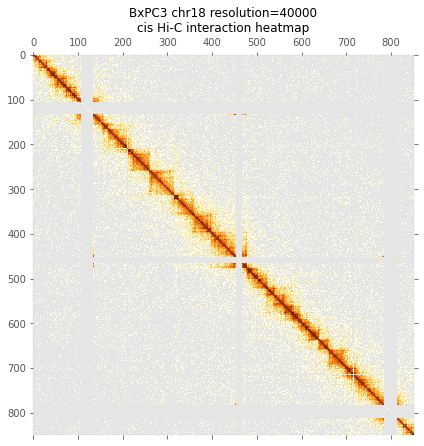

851


In [15]:
import argparse
import pandas as pd
import numpy as np
import os
import sys
import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt
from mpl_toolkits import axes_grid1
plt.style.use('ggplot')
#import itertools
#from functools import reduce
from scipy import sparse
import matplotlib.colors as colors

pd.set_option('display.precision', 2)
import argparse
import pandas as pd
import numpy as np
import os
import sys
import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt
from mpl_toolkits import axes_grid1
plt.style.use('ggplot')
#import itertools
#from functools import reduce
from scipy import sparse
import matplotlib.colors as colors

pd.set_option('display.precision', 2)

__author__ = 'Yuan Zan'
__mail__ = 'zanyuan@annoroad.com'
__date__ = '20160803'
__version__ = '1.0'
os.chdir('/result')

def add_colorbar(im, aspect=20, pad_fraction=0.5, **kwargs):
    """Add a vertical color bar to an image plot."""
    divider = axes_grid1.make_axes_locatable(im.axes)
    width = axes_grid1.axes_size.AxesY(im.axes, aspect=1/aspect)
    pad = axes_grid1.axes_size.Fraction(pad_fraction, width)
    current_ax = plt.gca()
    cax = divider.append_axes("right", size=width, pad=pad)
    plt.sca(current_ax)
    return im.axes.figure.colorbar(im, cax=cax, **kwargs)

def colormap1():
    # 白青绿黄红
    cdict = ['#FFFFFF', '#f5f329', '#e50b32']
    # 按照上面定义的colordict，将数据分成对应的部分，indexed：代表顺序
    return colors.ListedColormap(cdict, 'indexed')

def ppm(matrix):
    df = pd.DataFrame(np.ravel(np.log(matrix)))
    df = df[df != np.inf]
    df = df[df != -np.inf]
    pp = np.nanpercentile(df, 99)
    pm = np.nanpercentile(df, 20)
    return pm, pp


def heatmap(matrix,resolution,sample,outFile,chrom):
    fig = plt.figure(figsize=(7, 7))
    ax = fig.add_subplot(111)
    #cmaps = ['seismic','RdYlBu_r','RdBu_r','Spectral_r','coolwarm','RdYlGn_r']
    #cmaps = ['RdBu_r','Spectral_r','RdYlBu_r','RdBu_r','autumn_r','hot_r','Greys','Reds','YlOrBr','YlOrRd','hot_r','YlGn','YlGnBu','Blues','OrRd','summer','Oranges']
    cmaps = [plt.cm.get_cmap('Reds'),colormap1(),'YlOrBr','YlOrRd','autumn_r','hot_r']
    #cmap=plt.get_cmap(cmaps[3])

    pm, pp = ppm(matrix)
    cax = ax.matshow(np.log(matrix),cmap=cmaps[2],clim=(pm,pp))
    #ax.set_xlabel('chromosome')
    #ax.set_ylabel('Normalized interaction frequency')
    #help(ax.set_ylabel)
     
    ax.tick_params(bottom ='off',top='on',left='on',right='off') #去掉tick线
    ax.grid(False)
    #add_colorbar(cax)
    plt.title('{0} {1} resolution={2}\ncis Hi-C interaction heatmap'.format(sample,chrom,resolution),fontsize = 'large')
    #fig.add_axes(cax)
    #plt.colorbar(orientation="horizontal",cax=cax)

    ax.spines['bottom'].set_color('k')
    ax.spines['bottom'].set_linewidth(0.05)
    ax.spines['left'].set_color('k')
    ax.spines['left'].set_linewidth(0.05)
    ax.spines['top'].set_color('k')
    ax.spines['top'].set_linewidth(0.05)
    ax.spines['right'].set_color('k')
    ax.spines['right'].set_linewidth(0.05)

    plt.show()
    #fig.savefig(outFile)
def main():
    
    #matrix_file, bed_file, sample, chrom, outDir = argvs
    sample = 'BxPC3'
    outDir = './'
    chrom = 'chr18'
    #-----------------load file------------------#
    bed = pd.read_table('BxPC3_40000_chr18.bed',header=None,index_col = None,names=['chrom','start','end','bNum'],encoding='utf-8')
    bed = bed[bed['chrom'] == chrom]
    bed =bed[bed['start']>44000000]
    minN = bed.iloc[0,3]
    maxN = bed.iloc[-1,3]
    resolution = bed.iloc[0,2] - bed.iloc[0,1]
    #-----------------load iced asis matrix-------#
    '''
    nd1 = np.genfromtxt(args.icedAsisMatrix)

    nd1 = nd1[nd1[:,0] >= minN]
    nd1 = nd1[nd1[:,0] <= maxN]
    nd1 = nd1[nd1[:,1] >= minN]
    nd1 = nd1[nd1[:,1] <= maxN]
    '''


    #bed['bNum'] = bed['bNum'] - bed.iloc[0,3]
#    df.loc[:,0] = df.loc[:,0] - minN
#    df.loc[:,1] = df.loc[:,1] - minN
    #print (df)
    '''
    #----------------asis matrix consummate b2 b1 count-------#
    nd2 = nd1[nd1[:,1] != nd1[:,0]]
    nd2 = np.column_stack([nd2[:,1],nd2[:,0],nd2[:,2]])
    nd = np.vstack((nd1,nd2))
    nd1 = None
    nd2 = None
    '''
    #---------------------asis to complete matrix----------------------#    
    N = maxN - minN + 1

    df = pd.read_table('BxPC3_40000_chr18_symmetric.matrix', header=None,index_col = None,names=['b1','b2','contact'],encoding='utf-8')
    df= df[(df.iloc[:,0] >= minN) & (df.iloc[:,0] <= maxN) & (df.iloc[:,1] >= minN) & (df.iloc[:,1] <= maxN)]
    #df = df[df.iloc[:,0] <= maxN]
    #df = df[df.iloc[:,1] >= minN]
    #df = df[df.iloc[:,1] <= maxN]

    df['b1'] = df['b1'] - minN
    df['b2'] = df['b2'] - minN

    rlist=[]
    for i in range(784,132,-1):
        rlist.append(i)
    flist=[]
    for i in range(133,785):
        flist.append(i)
    df=df.replace(flist,rlist)
    d=pd.DataFrame({'b1':[132,133,134,135],'b2':[132,133,134,135],'contact':[0,0,0,0]})
    df=pd.concat([df,d])
    dfx=df
    df=df.replace([453],[135])
    df=df.replace([452],[134])
    df=df.replace([783],[452])
    df=df.replace([784],[133])

    df=df.replace([465],[132])
    df=df.replace([454],[108])
    df=df.replace([132],[135])
    #df=df.replace([451],[135])
    dfx=df


    dfx2=df
    #df = df[df.iloc[:,0].isin(bed['bNum']) & df.iloc[:,1].isin(bed['bNum'])]
    #counts = sparse.coo_matrix((nd[:,2], (nd[:,0], nd[:,1])), shape=(N, N), dtype=float)
    counts = sparse.coo_matrix((df['contact'], (df['b1'], df['b2'])), shape=(N, N), dtype=float)
#    counts = np.array(counts.todense())
    df = pd.DataFrame(counts.todense(),index = bed['bNum'].tolist(),columns = bed['bNum'].tolist())
    counts = None

    #-----------------------matshow and save matrix-----------------#
    outFile = os.path.join(outDir,'{0}_{1}_{2}_cis_interaction.pdf'.format(sample,resolution,chrom))
    heatmap(df,resolution,sample,outFile,chrom)

    outMatrix = os.path.join(outDir,'{0}_{1}_{2}_cis_interaction'.format(sample,resolution,chrom))
    print(len(bed))
    return df,dfx,dfx2

df2,dfx,dfx2=main()
plt.close()

/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.


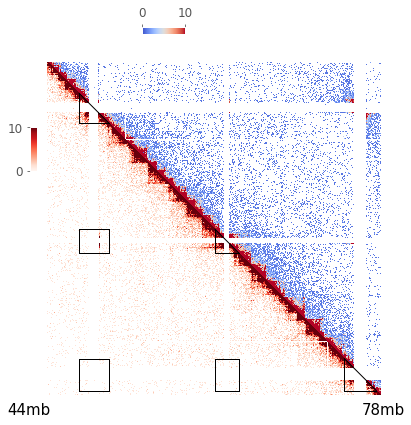

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import copy
import matplotlib as mpl
mpl.rcParams['pdf.fonttype']=42
mpl.rcParams['ps.fonttype']=42
from matplotlib.patches import Circle
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import copy
import math

dfx1 = df1.where(np.triu(np.ones(df1.shape)).astype(np.bool))
dfx2 = df2.where(np.triu(np.ones(df2.shape)).astype(np.bool))
dfx2=dfx2.T

def colorbar(ax,im,vmin,vmax,loc1,x,y,orien,w,h):
    axins1 = inset_axes(ax, width=w,height=h,loc=loc1, bbox_to_anchor=(x, y, 0.5, 1), bbox_transform=ax.transAxes,borderpad=0)
    cbar=plt.colorbar(im, cax=axins1, orientation=orien,ticks=[math.ceil(vmin),int(vmax)])
    axins1.tick_params(left='on',right='off',top='on',bottom='off',labelsize=12)
    axins1.yaxis.set_ticks_position('left')
    axins1.xaxis.set_ticks_position('top')
    return cbar

fig = plt.figure(figsize=(6, 6.5), facecolor="none")
ax = fig.add_subplot(111, facecolor="none")
ax2 = fig.add_subplot(111, facecolor="none")


my_cmap = copy.copy(mpl.cm.get_cmap("coolwarm"))
my_cmap.set_bad("none")
#my_cmap = copy.copy(mpl.cm.get_cmap("Reds"))
my_cmap2 = copy.copy(mpl.cm.get_cmap("Reds"))
my_cmap2.set_bad('none')
dfx1=dfx1.replace([0],[np.NaN])
dfx2=dfx2.replace([0],[np.NaN])
cax = ax.matshow(dfx1, cmap=my_cmap,vmin=0,vmax=10)
cax2 = ax2.matshow(dfx2, cmap=my_cmap2,vmin=0,vmax=10)

cbar=colorbar(ax,cax,0,10,'upper center',0.1,0.1,'horizontal',0.6,0.1)
cbar2=colorbar(ax2,cax2,0,10,'upper left',-0.05,-0.2,'vertical',0.1,0.6)

#96.125
#146.75
#441.0
#478.25
#770.0
#826.625

ax.set_xticks([])
ax.set_yticks([])
ax2.set_xticks([])
ax2.set_yticks([])
ax2.text(-100,900,'44mb',fontsize=15)
ax2.text(800,900,'78mb',fontsize=15)
x=np.arange(83,159,1)
y=[159]*len(x)
ax2.plot(x,y,color='black',linewidth=1)
y=[83]*len(x)
ax2.plot(x,x,color='black',linewidth=1)
ax2.plot(y,x,color='black',linewidth=1)
x=np.arange(428,490,1)
y=[490]*len(x)
ax2.plot(x,y,color='black',linewidth=1)
y=[428]*len(x)
ax2.plot(x,x,color='black',linewidth=1)
ax2.plot(y,x,color='black',linewidth=1)
x=np.arange(757,839,1)
y=[839]*len(x)
ax2.plot(x,y,color='black',linewidth=1)
y=[757]*len(x)
ax2.plot(x,x,color='black',linewidth=1)
ax2.plot(y,x,color='black',linewidth=1)

x=np.arange(83,159,1)
y=[428]*len(x)
ax2.plot(x,y,color='black',linewidth=1)
y=[490]*len(x)
ax2.plot(x,y,color='black',linewidth=1)

x=np.arange(83,159,1)
y=[757]*len(x)
ax2.plot(x,y,color='black',linewidth=1)
y=[839]*len(x)
ax2.plot(x,y,color='black',linewidth=1)

x=np.arange(83,159,1)
y=[428]*len(x)
ax2.plot(x,y,color='black',linewidth=1)
y=[490]*len(x)
ax2.plot(x,y,color='black',linewidth=1)

y=np.arange(428,490,1)
x=[83]*len(y)
ax2.plot(x,y,color='black',linewidth=1)
x=[159]*len(y)
ax2.plot(x,y,color='black',linewidth=1)

y=np.arange(757,839,1)
x=[83]*len(y)
ax2.plot(x,y,color='black',linewidth=1)
x=[159]*len(y)
ax2.plot(x,y,color='black',linewidth=1)

y=np.arange(757,839,1)
x=[428]*len(y)
ax2.plot(x,y,color='black',linewidth=1)
x=[490]*len(y)
ax2.plot(x,y,color='black',linewidth=1)

x=np.arange(428,490,1)
y=[757]*len(x)
ax2.plot(x,y,color='black',linewidth=1)
y=[839]*len(x)
ax2.plot(x,y,color='black',linewidth=1)

plt.savefig('/result/Fig7D.pdf')

   chrom     start       end    bNum  bNum2
0  chr18  47350000  47355000  525752      1
1  chr18  47355000  47360000  525753      2
2  chr18  47360000  47365000  525754      3
3  chr18  47365000  47370000  525755      4
4  chr18  47370000  47375000  525756      5
df         b1  b2  contact
578597   1   1      474
578598   1   2      290
578599   1   3       80
578600   1   4       42
578601   1   5       23
step1
1753
1 1753
1 1753
step2
step3


/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: divide by zero encountered in log
/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:74: RuntimeWarning: divide by zero encountered in log


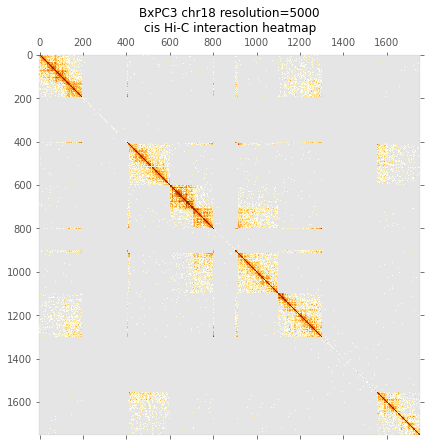

   1     2     3     4     5     6     7     8     9     10    ...  1745  \
1     0     0     0     0     0     0     0     0     0     0  ...     0   
2     0   474   290    80    42    23    20    14    25    21  ...     0   
3     0   290   256   163    26    24    19    10    29    14  ...     0   
4     0    80   163   302   113    36    60    25    20     7  ...     0   
5     0    42    26   113   311   135    89    24    21     7  ...     0   

   1746  1747  1748  1749  1750  1751  1752  1753  1754  
1     0     0     0     0     0     0     0     0     0  
2     1     0     0     0     0     0     0     0     0  
3     0     0     0     0     0     0     0     0     0  
4     0     0     0     0     0     0     0     0     0  
5     0     0     1     0     0     0     0     0     0  

[5 rows x 1754 columns]


In [36]:
import argparse
import pandas as pd
import numpy as np
import os
import sys
import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt
from mpl_toolkits import axes_grid1
plt.style.use('ggplot')
#import itertools
#from functools import reduce
from scipy import sparse
import matplotlib.colors as colors

pd.set_option('display.precision', 2)
import argparse
import pandas as pd
import numpy as np
import os
import sys
import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt
from mpl_toolkits import axes_grid1
plt.style.use('ggplot')
#import itertools
#from functools import reduce
from scipy import sparse
import matplotlib.colors as colors

pd.set_option('display.precision', 2)

__author__ = 'Yuan Zan'
__mail__ = 'zanyuan@annoroad.com'
__date__ = '20160803'
__version__ = '1.0'
os.chdir('/result')

def add_colorbar(im, aspect=20, pad_fraction=0.5, **kwargs):
    """Add a vertical color bar to an image plot."""
    divider = axes_grid1.make_axes_locatable(im.axes)
    width = axes_grid1.axes_size.AxesY(im.axes, aspect=1/aspect)
    pad = axes_grid1.axes_size.Fraction(pad_fraction, width)
    current_ax = plt.gca()
    cax = divider.append_axes("right", size=width, pad=pad)
    plt.sca(current_ax)
    return im.axes.figure.colorbar(im, cax=cax, **kwargs)

def colormap1():
    # 白青绿黄红
    cdict = ['#FFFFFF', '#f5f329', '#e50b32']
    # 按照上面定义的colordict，将数据分成对应的部分，indexed：代表顺序
    return colors.ListedColormap(cdict, 'indexed')

def ppm(matrix):
    df = pd.DataFrame(np.ravel(np.log(matrix)))
    df = df[df != np.inf]
    df = df[df != -np.inf]
    pp = np.nanpercentile(df, 99)
    pm = np.nanpercentile(df, 20)
    return pm, pp


def heatmap(matrix,resolution,sample,outFile,chrom):
    fig = plt.figure(figsize=(7, 7))
    ax = fig.add_subplot(111)
    #cmaps = ['seismic','RdYlBu_r','RdBu_r','Spectral_r','coolwarm','RdYlGn_r']
    #cmaps = ['RdBu_r','Spectral_r','RdYlBu_r','RdBu_r','autumn_r','hot_r','Greys','Reds','YlOrBr','YlOrRd','hot_r','YlGn','YlGnBu','Blues','OrRd','summer','Oranges']
    cmaps = [plt.cm.get_cmap('Reds'),colormap1(),'YlOrBr','YlOrRd','autumn_r','hot_r']
    #cmap=plt.get_cmap(cmaps[3])

    pm, pp = ppm(matrix)
    cax = ax.matshow(np.log(matrix),cmap=cmaps[2],clim=(pm,pp))
    #ax.set_xlabel('chromosome')
    #ax.set_ylabel('Normalized interaction frequency')
    #help(ax.set_ylabel)
     
    ax.tick_params(bottom ='off',top='on',left='on',right='off') #去掉tick线
    ax.grid(False)
    #add_colorbar(cax)
    plt.title('{0} {1} resolution={2}\ncis Hi-C interaction heatmap'.format(sample,chrom,resolution),fontsize = 'large')
    #fig.add_axes(cax)
    #plt.colorbar(orientation="horizontal",cax=cax)

    ax.spines['bottom'].set_color('k')
    ax.spines['bottom'].set_linewidth(0.05)
    ax.spines['left'].set_color('k')
    ax.spines['left'].set_linewidth(0.05)
    ax.spines['top'].set_color('k')
    ax.spines['top'].set_linewidth(0.05)
    ax.spines['right'].set_color('k')
    ax.spines['right'].set_linewidth(0.05)

    plt.show()
    #fig.savefig(outFile)
def main():
    
    #matrix_file, bed_file, sample, chrom, outDir = argvs
    sample = 'BxPC3'
    outDir = './'
    chrom = 'chr18'
    #-----------------load file------------------#
    bed = pd.read_table('BxPC3_5000_abs.bed',header=None,index_col = None,names=['chrom','start','end','bNum'],encoding='utf-8')
    bed = bed[bed['chrom'] == chrom]
    bed = bed[bed['start']>44000000]
    x=525082
    bed =bed.reset_index(drop=True)
    bed= bed[((bed['bNum']>x+869-200) & (bed['bNum']<x+1074+200)) | ((bed['bNum']>x+3628-200) & (bed['bNum']<x+3726+200)) | ((bed['bNum']>x+6260-200) & (bed['bNum']<x+6513+200)) ]
    bed=bed.reset_index(drop=True)
    bed['bNum2']=bed.index+1
    print (bed.head())
    minN = bed.iloc[0,4]
    maxN = bed.iloc[-1,4]
    resolution = bed.iloc[0,2] - bed.iloc[0,1]
    #-----------------load iced asis matrix-------#
    '''
    nd1 = np.genfromtxt(args.icedAsisMatrix)

    nd1 = nd1[nd1[:,0] >= minN]
    nd1 = nd1[nd1[:,0] <= maxN]
    nd1 = nd1[nd1[:,1] >= minN]
    nd1 = nd1[nd1[:,1] <= maxN]
    '''
    x=525082

    #bed['bNum'] = bed['bNum'] - bed.iloc[0,3]
#    df.loc[:,0] = df.loc[:,0] - minN
#    df.loc[:,1] = df.loc[:,1] - minN
    #print (df)
    '''
    #----------------asis matrix consummate b2 b1 count-------#
    nd2 = nd1[nd1[:,1] != nd1[:,0]]
    nd2 = np.column_stack([nd2[:,1],nd2[:,0],nd2[:,2]])
    nd = np.vstack((nd1,nd2))
    nd1 = None
    nd2 = None
    '''
    #---------------------asis to complete matrix----------------------#    

    df = pd.read_table('BxPC3_5000_symmetric.matrix', header=None,index_col = None,names=['b1','b2','contact'],encoding='utf-8')
    
    df= df[((df['b1']>x+869-200) & (df['b1']<x+1074+200)) | ((df['b1']>x+3628-200) & (df['b1']<x+3726+200)) | ((df['b1']>x+6260-200) & (df['b1']<x+6513+200)) ]
    df= df[((df['b2']>x+869-200) & (df['b2']<x+1074+200)) | ((df['b2']>x+3628-200) & (df['b2']<x+3726+200)) | ((df['b2']>x+6260-200) & (df['b2']<x+6513+200)) ]
    #df = df[df.iloc[:,0] <= maxN]
    #df = df[df.iloc[:,1] >= minN]
    #df = df[df.iloc[:,1] <= maxN]
    df=df.replace(list(bed['bNum']),list(bed['bNum2']))
    print ('df',df.head())
    N = 1754
    df = df[df.iloc[:,0].isin(bed['bNum2']) & df.iloc[:,1].isin(bed['bNum2'])]
    #counts = sparse.coo_matrix((df[:,2], (df[:,0], df[:,1])), shape=(N, N), dtype=int)
    print ('step1')
    print (len(bed))
    print (df['b1'].min(),df['b1'].max())
    print (df['b2'].min(),df['b2'].max())
    counts = sparse.coo_matrix((list(df['contact']), (list(df['b1']), list(df['b2']))), shape=(N, N), dtype=int)
    #counts=counts.toarray()
    print ('step2')
    #counts = np.array(counts.todense())
    df = pd.DataFrame(counts.todense(),index = bed['bNum2'].tolist()+[1754],columns = bed['bNum2'].tolist()+[1754])
    print ('step3')
    counts = None

    #-----------------------matshow and save matrix-----------------#
    outFile = os.path.join(outDir,'{0}_{1}_{2}_cis_interaction.pdf'.format(sample,resolution,chrom))
    heatmap(df,resolution,sample,outFile,chrom)

    outMatrix = os.path.join(outDir,'{0}_{1}_{2}_cis_interaction'.format(sample,resolution,chrom))
    return df

df=main()
print (df.head())
#df.to_csv('gene_matrix.xls',sep='\t')
plt.close()

   1     2     3     4     5     6     7     8     9     10    ...  1745  \
1     0     0     0     0     0     0     0     0     0     0  ...     0   
2     0   474   290    80    42    23    20    14    25    21  ...     0   
3     0   290   256   163    26    24    19    10    29    14  ...     0   
4     0    80   163   302   113    36    60    25    20     7  ...     0   
5     0    42    26   113   311   135    89    24    21     7  ...     0   

   1746  1747  1748  1749  1750  1751  1752  1753  1754  
1     0     0     0     0     0     0     0     0     0  
2     1     0     0     0     0     0     0     0     0  
3     0     0     0     0     0     0     0     0     0  
4     0     0     0     0     0     0     0     0     0  
5     0     0     1     0     0     0     0     0     0  

[5 rows x 1754 columns]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  if sys.path[0] == '':


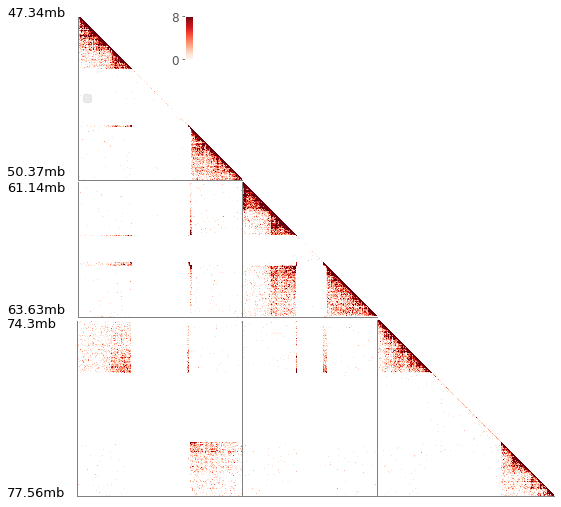

In [37]:

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import copy
import math

import matplotlib as mpl
mpl.rcParams['pdf.fonttype']=42
mpl.rcParams['ps.fonttype']=42
print (df.head())

def colorbar(ax,im,vmin,vmax):
    axins1 = inset_axes(ax, width=0.1,height=0.6,loc="upper right", bbox_to_anchor=(0.2, 0, 0.5, 1), bbox_transform=ax.transAxes,borderpad=0)
    cbar=plt.colorbar(im, cax=axins1, orientation='vertical',ticks=[math.ceil(vmin),int(vmax)])
    axins1.tick_params(left='on',right='off',top='off',bottom='off',labelsize=12)
    axins1.yaxis.set_ticks_position('left')
    return cbar


df=df.reset_index(drop=True)
df.columns=list(df.index)
df1=df.loc[0:605,0:605]
df2=df.loc[0:605,605:1103]
df3=df.loc[0:605,605:1103]
df4=df.loc[605:1103,0:605]
df5=df.loc[605:1103,605:1103]
df6=df.loc[605:1103,1103:1754]
df7=df.loc[1103:1754,0:605]
df8=df.loc[1103:1754,605:1103]
df9=df.loc[1103:1754,1103:1754]



df1 = df1.where(np.triu(np.ones(df1.shape)).astype(np.bool))
df1=df1.T
df5=df5.where(np.triu(np.ones(df5.shape)).astype(np.bool))
df5=df5.T
df9=df9.where(np.triu(np.ones(df9.shape)).astype(np.bool))
df9=df9.T

df1=df1.replace([0],[np.NaN])
df2=df2.replace([0],[np.NaN])
df3=df3.replace([0],[np.NaN])
df4=df4.replace([0],[np.NaN])
df5=df5.replace([0],[np.NaN])
df7=df7.replace([0],[np.NaN])
df8=df8.replace([0],[np.NaN])
df9=df9.replace([0],[np.NaN])

fig = plt.figure(figsize=(7.6,7.6))
ax1 = fig.add_axes([0.13,0.622,0.301,0.3])
#ax2 = fig.add_axes([0.35,0.596,0.216,0.3])
#ax3 = fig.add_axes([0.566,0.596,0.33,0.3])
ax4 = fig.add_axes([0.13,0.373,0.3,0.247])
ax5 = fig.add_axes([0.43,0.373,0.247,0.247])
#ax6 = fig.add_axes([0.566,0.38,0.33,0.216])
ax7 = fig.add_axes([0.13,0.044,0.3,0.324])
ax8 = fig.add_axes([0.43,0.044,0.247,0.324])
ax9 = fig.add_axes([0.677,0.0445,0.324,0.324])

my_cmap1 = copy.copy(matplotlib.cm.get_cmap("Reds"))
my_cmap2 = copy.copy(matplotlib.cm.get_cmap("Reds"))
my_cmap3 = copy.copy(matplotlib.cm.get_cmap("Reds"))
my_cmap4 = copy.copy(matplotlib.cm.get_cmap("Reds"))
my_cmap5 = copy.copy(matplotlib.cm.get_cmap("Reds"))
my_cmap6 = copy.copy(matplotlib.cm.get_cmap("Reds"))
my_cmap7 = copy.copy(matplotlib.cm.get_cmap("Reds"))
my_cmap8 = copy.copy(matplotlib.cm.get_cmap("Reds"))
my_cmap9 = copy.copy(matplotlib.cm.get_cmap("Reds"))

im=ax1.matshow(df1, cmap=my_cmap1,vmin=0,vmax=8)
ax1.set_facecolor('white')
ax1.legend(loc="center left")
ax1.text(-260, 0, '47.34mb', fontsize=13)
ax1.text(-260, 587, '50.37mb', fontsize=13)
ax1.text(-260, 647, '61.14mb', fontsize=13)
ax4.text(-260, 486, '63.63mb', fontsize=13)
ax4.text(-260, 536, '74.3mb', fontsize=13)
ax7.text(-260, 650, '77.56mb', fontsize=13)
#ax2.matshow(df2, cmap=my_cmap2,vmin=0,vmax=8)
#ax3.matshow(df3, cmap=my_cmap3,vmin=0,vmax=8)
ax4.matshow(df4, cmap=my_cmap4,vmin=0,vmax=8)
ax4.set_facecolor('white')
ax5.matshow(df5, cmap=my_cmap5,vmin=0,vmax=8)
ax5.set_facecolor('white')
#ax6.matshow(df6, cmap=my_cmap6,vmin=0,vmax=8)
ax7.matshow(df7, cmap=my_cmap7,vmin=0,vmax=8)
ax7.set_facecolor('white')
ax8.matshow(df8, cmap=my_cmap8,vmin=0,vmax=8)
ax8.set_facecolor('white')
ax9.matshow(df9, cmap=my_cmap9,vmin=0,vmax=8)
ax9.set_facecolor('white')

cbar=colorbar(ax1,im,0,8)


ax_list=[ax1,ax4,ax5,ax7,ax8,ax9]
for ax in ax_list:
    ax.set_xticks([])
    ax.set_yticks([])
    ax.spines['bottom'].set_color('0.5')
    ax.spines['left'].set_color('0.5')

plt.savefig('Fig7C热图.pdf')

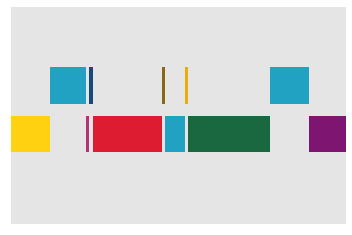

In [38]:
#plt.close()
import pandas as pd
ax = plt.axes()
ax.set_ylim(0.7,1.6)
ax.set_xlim(0,221)
bins=[]
color=[]
bottom=[]
height=[]
for i in range(850):
    if i <=25:
        bins.append(i)
        color.append('#FFD111')
        bottom.append(1)
        height.append(0.15)
    elif i >25 and i<=49:
        bins.append(i)
        color.append('#22a2c3')
        bottom.append(1.2)
        height.append(0.15)
    elif i>49 and i <=51:
        bins.append(i)
        color.append('#ba2f7b')
        bottom.append(1)
        height.append(0.15)
    elif i>51 and i<=53:
        bins.append(i)
        color.append('#144a74')
        bottom.append(1.2)
        height.append(0.15)
    elif i>53 and i<=99:
        bins.append(i)
        color.append('#de1c31')
        bottom.append(1)
        height.append(0.15)
    elif i>99 and i<=101:
        bins.append(i)
        color.append('#876818')
        bottom.append(1.2)
        height.append(0.15)
    elif i>101 and i<=114:
        bins.append(i)
        color.append('#22a2c3')
        bottom.append(1)
        height.append(0.15)
    elif i>=114 and i<=116:
        bins.append(i)
        color.append('#e8b004')
        bottom.append(1.2)
        height.append(0.15)
    elif i>116 and i<=170:
        bins.append(i)
        color.append('#1a6840')
        bottom.append(1)
        height.append(0.15)
    elif i>170 and i<=196:
        bins.append(i)
        color.append('#22a2c3')
        bottom.append(1.2)
        height.append(0.15)
    elif i>196 and i<=221:
        bins.append(i)
        color.append('#7e1671')
        bottom.append(1)
        height.append(0.15)
df=pd.DataFrame({'bins':bins,'color':color,'bottom':bottom,'height':height})
for i in range(len(df)):
    ax.bar(df['bins'][i], df['height'][i], 1, bottom=df['bottom'][i],color=df['color'][i],align='edge')
ax.set_xticks([])
ax.set_yticks([])
ax.spines['bottom'].set_linewidth(0)
ax.spines['left'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)
ax.spines['top'].set_linewidth(0)
plt.savefig('/result/fig7C_bar.pdf')

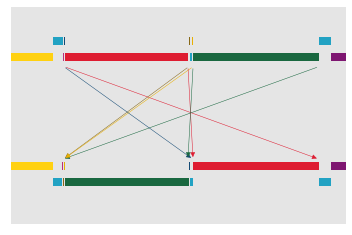

In [39]:

import pandas as pd
ax = plt.axes()
ax.set_ylim(-2,2)
ax.set_xlim(0,850)
bins=[]
color=[]
bottom=[]
height=[]
for i in range(850):
    if i <=107:
        bins.append(i)
        color.append('#FFD111')
        bottom.append(1)
        height.append(0.15)
    elif i >107 and i<=133:
        bins.append(i)
        color.append('#22a2c3')
        bottom.append(1.3)
        height.append(0.15)
    elif i>133 and i <=135:
        bins.append(i)
        color.append('#ba2f7b')
        bottom.append(1)
        height.append(0.15)
    elif i>135 and i<=137:
        bins.append(i)
        color.append('#144a74')
        bottom.append(1.3)
        height.append(0.15)
    elif i>137 and i<=450:
        bins.append(i)
        color.append('#de1c31')
        bottom.append(1)
        height.append(0.15)
    elif i>451 and i<=453:
        bins.append(i)
        color.append('#876818')
        bottom.append(1.3)
        height.append(0.15)
    elif i>453 and i<=460:
        bins.append(i)
        color.append('#22a2c3')
        bottom.append(1)
        height.append(0.15)
    elif i>=461 and i<=463:
        bins.append(i)
        color.append('#e8b004')
        bottom.append(1.3)
        height.append(0.15)
    elif i>463 and i<=781:
        bins.append(i)
        color.append('#1a6840')
        bottom.append(1)
        height.append(0.15)
    elif i>782 and i<=812:
        bins.append(i)
        color.append('#22a2c3')
        bottom.append(1.3)
        height.append(0.15)
    elif i>813 and i<=849:
        bins.append(i)
        color.append('#7e1671')
        bottom.append(1)
        height.append(0.15)
df=pd.DataFrame({'bins':bins,'color':color,'bottom':bottom,'height':height})
for i in range(len(df)):
    ax.bar(df['bins'][i], df['height'][i], 1, bottom=df['bottom'][i],color=df['color'][i],align='edge')
    
    
    
bins=[]
color=[]
bottom=[]
height=[]
for i in range(850):
    if i <=107:
        bins.append(i)
        color.append('#FFD111')
        bottom.append(-1)
        height.append(0.15)
    elif i >107 and i<=130:
        bins.append(i)
        color.append('#22a2c3')
        bottom.append(-1.3)
        height.append(0.15)
    elif i>=131 and i <=133:
        bins.append(i)
        color.append('#ba2f7b')
        bottom.append(-1)
        height.append(0.15)
    elif i>133 and i<=135:
        bins.append(i)
        color.append('#876818')
        bottom.append(-1.3)
        height.append(0.15) 
    elif i>135 and i<=137:
        bins.append(i)
        color.append('#e8b004')
        bottom.append(-1)
        height.append(0.15)
    elif i>137 and i<=452:
        bins.append(i)
        color.append('#1a6840')
        bottom.append(-1.3)
        height.append(0.15)
    elif i>452 and i<=454:
        bins.append(i)
        color.append('#144a74')
        bottom.append(-1)
        height.append(0.15)
    elif i>454 and i<=463:
        bins.append(i)
        color.append('#22a2c3')
        bottom.append(-1.3)
        height.append(0.15)
    elif i>463 and i<=782:
        bins.append(i)
        color.append('#de1c31')
        bottom.append(-1)
        height.append(0.15)   
    elif i>782 and i<=812:
        bins.append(i)
        color.append('#22a2c3')
        bottom.append(-1.3)
        height.append(0.15)
    elif i>813 and i<=849:
        bins.append(i)
        color.append('#7e1671')
        bottom.append(-1)
        height.append(0.15)
df=pd.DataFrame({'bins':bins,'color':color,'bottom':bottom,'height':height})
for i in range(len(df)):
    ax.bar(df['bins'][i], df['height'][i], 1, bottom=df['bottom'][i],color=df['color'][i],align='edge')
    
#plt.arrow(x=138, y=0.9, dx=647, dy=-1.65, width=.01,length_includes_head=True,head_length=7,head_width=0.1,color='#de1c31')
#plt.arrow(x=450, y=0.9, dx=13, dy=-1.65, width=.01,length_includes_head=False,head_length=0,head_width=0,color='#de1c31',shape='right')
#plt.arrow(x=782, y=0.9, dx=-647, dy=-1.65, width=.01,length_includes_head=True,head_length=7,head_width=0.1,color='#1a6840')
#plt.arrow(x=463, y=0.9, dx=-13, dy=-1.65, width=.01,length_includes_head=False,head_length=0,head_width=0,color='#1a6840',shape='right')
#plt.arrow(x=452, y=0.9, dx=-322, dy=-1.65, width=.01,length_includes_head=True,head_length=7,head_width=0.1,color='#876818')
#plt.arrow(x=463, y=0.9, dx=-330, dy=-1.65, width=.01,length_includes_head=True,head_length=7,head_width=0.1,color='#e8b004')
#plt.arrow(x=135, y=0.9, dx=328, dy=-1.65, width=.01,length_includes_head=True,head_length=7,head_width=0.1,color='#144a74')


plt.annotate( '', xy=(782,-0.8),xytext=(136, 0.9),arrowprops=dict( arrowstyle="-|>",color='#de1c31' ,linewidth=0.5))
plt.annotate( '', xy=(133,-0.8),xytext=(782, 0.9),arrowprops=dict( arrowstyle="-|>",color='#1a6840' ,linewidth=0.5))
plt.annotate( '', xy=(134,-0.8),xytext=(452, 0.9),arrowprops=dict( arrowstyle="-|>",color='#876818' ,linewidth=0.5))
plt.annotate( '', xy=(135,-0.8),xytext=(463, 0.9),arrowprops=dict( arrowstyle="-|>",color='#e8b004' ,linewidth=0.5))
plt.annotate( '', xy=(462,-0.8),xytext=(135, 0.9),arrowprops=dict( arrowstyle="-|>",color='#144a74' ,linewidth=0.5))
plt.annotate( '', xy=(463,-0.8),xytext=(450, 0.9),arrowprops=dict( arrowstyle="-|>",color='#de1c31' ,linewidth=0.5))
plt.annotate( '', xy=(450,-0.8),xytext=(463, 0.9),arrowprops=dict( arrowstyle="-|>",color='#1a6840' ,linewidth=0.5))
    
ax.set_xticks([])
ax.set_yticks([])
ax.spines['bottom'].set_linewidth(0)
ax.spines['left'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)
ax.spines['top'].set_linewidth(0)
plt.savefig('SV_arrow.pdf')

In [4]:
pwd

'/result'

In [34]:
print (df.tail())

     0    1    2    3    4    5    6    7    8    9    ...   841   842   843  \
846  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  19.0  36.0  19.0   
847  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...   7.0  15.0  15.0   
848  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  13.0  25.0  21.0   
849  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...   4.0  19.0   9.0   
850  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   

      844    845    846    847    848    849  850  
846  61.0  164.0  726.0   67.0   51.0   52.0  0.0  
847  18.0   22.0   67.0  458.0   88.0   78.0  0.0  
848  20.0   33.0   51.0   88.0  875.0  155.0  0.0  
849  14.0   24.0   52.0   78.0  155.0  494.0  0.0  
850   0.0    0.0    0.0    0.0    0.0    0.0  0.0  

[5 rows x 851 columns]
